In this notebook we show how to implement the most common performance measures for regression and classification problems.

# Regression

Measuring regression performances is often related to measuring some kind of error (e.g. the true value minus the predicted value) unless you are measuring correlations.

## Test dataset

We start from three lists:

* the true values
* a first set of predicted values, with a little noise added
* a second set, with a lot of noise added

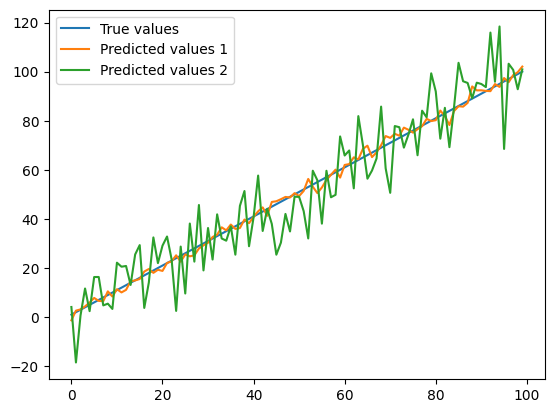

In [33]:
# Values from one to one hundred
true_vals = list(range(1, 101))

# Predicted values are the same, plus some gaussian noise
import numpy as np
pred_vals_1 = true_vals + np.random.normal(0, 2, 100)
pred_vals_2 = true_vals + np.random.normal(0, 10, 100)

# Let's plot the two lists
import matplotlib.pyplot as plt
plt.plot(true_vals, label='True values')
plt.plot(pred_vals_1, label='Predicted values 1')
plt.plot(pred_vals_2, label='Predicted values 2')
plt.legend()
plt.show()

## Mean Absolute Error

Sometimes predictions shoot above the true value, sometiimes the shot below. If we were to take just the differences we would have a number of difficult interpretation: sometimes positive, sometimes negative, and sometimes even very close to zero because all the peaks and valleys cancel out:

In [34]:
# Taking the difference
errors_1 = true_vals - pred_vals_1
errors_2 = true_vals - pred_vals_2

# Averaging along all samples
print('Sum of errors 1:' , np.mean(errors_1))
print('Sum of errors 2:' , np.mean(errors_2))

Sum of errors 1 -0.07810821857013212
Sum of errors 2 -0.06199501137093264


An easy way to compensate the drawbacks is to take the absolute value of the errors before adding them up:

In [35]:
MAE_1 = np.mean(np.abs(errors_1))
MAE_2 = np.mean(np.abs(errors_2))
print('MAE 1:', MAE_1)
print('MAE 2:', MAE_2)

MAE 1 1.4077508780393948
MAE 2 8.562098932432658


The same results can be obtained using sklearn package, which contains [many functions](https://scikit-learn.org/stable/api/sklearn.metrics.html) to implement performance metrics.

In [37]:
from sklearn.metrics import mean_absolute_error
MAE_1_sklearn = mean_absolute_error(true_vals, pred_vals_1)
MAE_2_sklearn = mean_absolute_error(true_vals, pred_vals_2)

print('MAE 1 (sklearn):', MAE_1_sklearn)
print('MAE 2 (sklearn):', MAE_2_sklearn)

MAE 1 (sklearn) 1.4077508780393948
MAE 2 (sklearn) 8.562098932432658


## MSE, RMSE

- Mean Squared Error
- Root Mean Squared Error

Similar measures, they start from the same issue of not having peaks and valleys cancelling out, but this time the errors are squared instead of going through the absolute operator. This give the measure some nice mathematical properties (in particular, MSE and RMSE are easily differentiable).

The two measures are the same, conceptually (the closer to zero, the better). But RMSE is defined in the same scale of the original data, so it's easier to put into context.

In [39]:
# Computing mean squared error
MSE_1 = np.mean(errors_1**2)
MSE_2 = np.mean(errors_2**2)
print('MSE 1:', MSE_1)
print('MSE 2:', MSE_2)

# Using sklearn
from sklearn.metrics import mean_squared_error
print('MSE 1 (sklearn):', mean_squared_error(true_vals, pred_vals_1))
print('MSE 2 (sklearn):', mean_squared_error(true_vals, pred_vals_2))

# RMSE is just MSE plus a square root
RMSE_1 = np.sqrt(MSE_1)
RMSE_2 = np.sqrt(MSE_2)
print('RMSE 1:', RMSE_1)
print('RMSE 2:', RMSE_2)

# Using sklearn
from sklearn.metrics import root_mean_squared_error
print('RMSE 1 (sklearn):', root_mean_squared_error(true_vals, pred_vals_1))
print('RMSE 2 (sklearn):', root_mean_squared_error(true_vals, pred_vals_2))

MSE 1: 3.211151288730428
MSE 2: 112.88314159973034
MSE 1 (sklearn): 3.211151288730428
MSE 2 (sklearn): 112.88314159973034
RMSE 1: 1.7919685512671333
RMSE 2: 10.624647834151038
RMSE 1 (sklearn): 1.7919685512671333
RMSE 2 (sklearn): 10.624647834151038


## Correlations

In statistics, correlation is any statistical relationship (causal or not, since [correlation does not imply causation!](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)) between two random variables. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it usually refers to how much a pair of variables are *linearly* related.

By far the most common correlation is [Pearson's correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), with the second most common being [Spearman's](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).

Both correlations range from -1 (total anticorrelation) to +1 (total correlation) with zero indicating absence of correlation. Both are neutral to linear transformations (see examples below). Spearman's correlation focuses on the ranking and not on the actual values.

Usually we do not explicitly compute the correlation and use instead existing functions, e.g. those found in the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)  package.

In [45]:
from scipy.stats import pearsonr
pear_1 = pearsonr(true_vals, pred_vals_1)
pear_2 = pearsonr(true_vals, pred_vals_2)
print("Pearson 1:", pear_1)
print("Pearson 2:", pear_2)

# Notice that the result comes with an attached p-value. From the documentation:
#   "The p-value roughly indicates the probability of an uncorrelated system
#    producing datasets that have a Pearson correlation at least as extreme as
#    the one computed from these datasets."

Pearson 1: PearsonRResult(statistic=np.float64(0.9981684586352938), pvalue=np.float64(3.2733471338295645e-121))
Pearson 2: PearsonRResult(statistic=np.float64(0.9404271526354696), pvalue=np.float64(1.0367344014439563e-47))


In [46]:
# Pearson's correlation is transparent to linear transformations
pear_1 = pearsonr(true_vals, pred_vals_1 * 5)
pear_2 = pearsonr(true_vals, pred_vals_2 - 200)
print("Pearson 1:", pear_1)
print("Pearson 2:", pear_2)

Pearson 1: PearsonRResult(statistic=np.float64(0.9981684586352937), pvalue=np.float64(3.273347133848993e-121))
Pearson 2: PearsonRResult(statistic=np.float64(0.9404271526354699), pvalue=np.float64(1.0367344014437725e-47))


Spearman's correlation is all about ranking. It doesn't care about actual values, the important thing is that the largest value is in, e.g. the third slot in both arrays, and then the second-largest in the seventh slot and so forth.

In [42]:
from scipy.stats import spearmanr
spea_1 = spearmanr(true_vals, pred_vals_1)
spea_2 = spearmanr(true_vals, pred_vals_2)
print(spea_1)
print(spea_2)

SignificanceResult(statistic=np.float64(0.9983558355835583), pvalue=np.float64(1.6603696998288793e-123))
SignificanceResult(statistic=np.float64(0.9457665766576656), pvalue=np.float64(1.184280121053861e-49))


To demonstrate that ranking is unaffected, we change the largest predicted value with a very, very large number. Spearman's correlation will be the same, while Pearson's will change.

In [49]:
big_first = pred_vals_1

# Where is the largest value?
i = np.argmax(big_first)

# Changing the max value to a very large number
big_first[i] = 10000000

# Comparing the two correlations
print(pearsonr(true_vals, big_first))
print(spearmanr(true_vals, big_first))

PearsonRResult(statistic=np.float64(0.17237390185435825), pvalue=np.float64(0.08635823180038754))
SignificanceResult(statistic=np.float64(0.9983558355835583), pvalue=np.float64(1.6603696998288793e-123))


# Classification

In classification problems the true values are discrete labels, without any ordering. All the performance metrics gravitate around the concept of counting how many labels are correctly assigned over the total predictions.

## Test datasets

Classification problems can be balanced (all classes are roughly equally present) or unbalanced (one class is much more or much less present than the others). We thus propose two datasets to illustrate the various metrics.

In [50]:
# First dataset: a balanced three-classes dataset (3 apples, 4 oranges, 3 bananas)
true_vals_bal = ['apple', 'apple', 'apple', 'orange', 'orange', 'orange', 'orange', 'banana', 'banana', 'banana']

# Second dataset: an unbalanced two-classes dataset: 19 kiwis, one pineapple
true_vals_unbal = ['kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi',
                   'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi',
                   'kiwi', 'kiwi', 'kiwi', 'kiwi', 'kiwi',
                   'kiwi', 'kiwi', 'kiwi', 'kiwi', 'pineapple']

## Accuracy

Accuracy is the most intuitive classification metric: let's just compute the total of correctly classified samples over the total samples. It naturally spans from zero (all errors) to one (perfect classifications). Unfortunately, it doesn't work well with unbalanced data.

In [52]:
# First round of predictions: let's just flip a couple of labels
pred_vals_bal = true_vals_bal.copy()
pred_vals_bal[0] = 'orange'
pred_vals_bal[1] = 'banana'

pred_vals_unbal = true_vals_unbal.copy()
pred_vals_unbal[0] = 'pineapple'
pred_vals_unbal[1] = 'pineapple'

from sklearn.metrics import accuracy_score
print('Accuracy balanced:', accuracy_score(true_vals_bal, pred_vals_bal))
print('Accuracy unbalanced:', accuracy_score(true_vals_unbal, pred_vals_unbal))

Accuracy balanced: 0.8
Accuracy unbalanced: 0.9


Let's now simulate a useless predictor: one that just spams the majority class instead of actually doing its work.

In [53]:
spam_bal   = ['orange'] * len(true_vals_bal)
spam_unbal = ['kiwi']   * len(true_vals_unbal)
print('Accuracy of spam predictor:')
print('- on balanced set:', accuracy_score(true_vals_bal, spam_bal))
print('- on unbalanced set:', accuracy_score(true_vals_unbal, spam_unbal))

Accuracy of spam predictor:
- on balanced set: 0.4
- on unbalanced set: 0.95


## Confusion matrix

A [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is a compact representation of a classification outcome. It allows to break down class-by-class the predictions and highlight what was correctly classified and where the errors lie.

When applied to binary classification (two classes) there's a special nomenclature, inherited from medicine (positive, negative, true positive, true negative, false positive, false negative).

Remember that predictions are columns, true values are rows:




```

                       CLASSIFIED AS
              | Class 1 | Class 2 | Class 3 |
              +---------+---------+---------+
              |         |         |         |
True class 1  |         |         |         |
              |         |         |         |
              +---------+---------+---------+
              |         |         |         |
True class 2  |         |         |         |
              |         |         |         |
              +---------+---------+---------+
              |         |         |         |
True class 3  |         |         |         |
              |         |         |         |
              +---------+---------+---------+
```





In [56]:
from sklearn.metrics import confusion_matrix

cm_bal  = confusion_matrix(true_vals_bal, pred_vals_bal)
print('Confusion matrix for balanced case:')
print(cm_bal)

cm_spam_bal  = confusion_matrix(true_vals_bal, spam_bal)
print('\nConfusion matrix for spam classifier, balanced case:')
print(cm_spam_bal)

Confusion matrix balanced:
[[1 1 1]
 [0 3 0]
 [0 0 4]]

Confusion matrix for spam classifier, balanced case:
[[0 0 3]
 [0 0 3]
 [0 0 4]]


## F1 score

It's [a metric](https://en.wikipedia.org/wiki/F-score) aiming to take into account class unbalancedness. It is defined in terms of binary classification as:

```
          2TP
F1 = -------------
     2TP + FP + FN
```

It ranges from one (perfect predictions) to zero (all mistakes).

F1 score can be extended to multiclass classification by computing the F1 score for each class (which is considered the "positive" case, while all other classes are clumped into the "negative" bin). The final result is then reported separately by class, or averaged.

In [69]:
from sklearn.metrics import f1_score

print('F1 scores for balanced case:')
print('- per class       :', f1_score(true_vals_bal, pred_vals_bal, average=None))
print('- averaged        :', f1_score(true_vals_bal, pred_vals_bal, average='macro'))

print('\n')
print('F1 scores for unbalanced case:')
print('- per class       :', f1_score(true_vals_unbal, pred_vals_unbal, average=None))
print('- averaged        :', f1_score(true_vals_unbal, pred_vals_unbal, average='macro'))

print('\n')
print('F1 scores for spam predictor, unbalanced case:')
print('- per class       :', f1_score(true_vals_unbal, spam_unbal, average=None))
print('- averaged        :', f1_score(true_vals_unbal, spam_unbal, average='macro'))

F1 scores for balanced case:
- per class       : [0.5        0.85714286 0.88888889]
- averaged        : 0.7486772486772487


F1 scores for unbalanced case:
- per class       : [0.94444444 0.5       ]
- averaged        : 0.7222222222222222


F1 scores for spam predictor, unbalanced case:
- per class       : [0.97435897 0.        ]
- averaged        : 0.48717948717948717
